# Analisis

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
import seaborn as sns

#  pip3 install seaborn==0.9.0

## Cargar Resultados y data Original

In [2]:

def leer_data():
    outfile='./SOURCES/consulta.csv'
    data = pd.read_csv(outfile)
    return data

def leer_footprint():
    outfile='./SOURCES/U.general.footprints'
    data = pd.read_csv(outfile)
    return data

data = leer_data()
footprint = leer_footprint()
print('Done')
data.head(2)

Done


,client_id,date,año,mes,dia,hora,merchant_departement,merchant_province,merchant_district,mcc,mccg,client_age,quantity,amount_sol
0,+++g8j9k+5A=,2016-07-07 01:08:05,2016,7,7,1,LIMA,LIMA,San Juan De Luriganc,5655,8,32.0,1,45.0
1,++/oQ9Lb9dI=,2017-05-29 21:05:40,2017,5,29,21,LIMA,LIMA,San Juan De Luriganc,4812,25,49.0,1,104.0


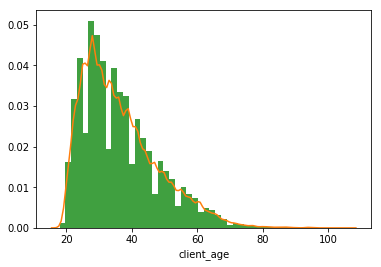

In [3]:

ages = data["client_age"].dropna()
plt.hist(ages, 50, density=True, facecolor='g', alpha=0.75)
sns.distplot(ages, hist = False, kde = True)



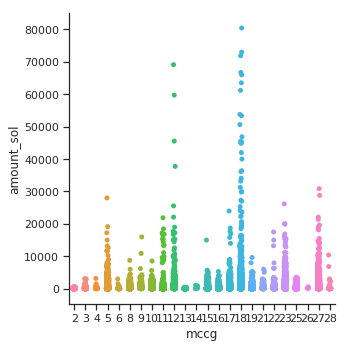

In [4]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="mccg", y="amount_sol", data=data);

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("client_age","amount_sol", data=data, kind="kde")

## para cada mccg

In [ ]:
mccg = data.groupby(['mccg']).min().index.values
mccg

for j in range(len(mccg)):
    data_temp = data.loc[data['mccg'] == mccg[j]] 
    sns.jointplot("client_age","amount_sol", data=data_temp, kind="kde")
    title = "Histograma el Mccg " + str(mccg[j])
    print()